In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Regression Dataset - Quadratic</h2>
Input Feature: X  

Target: 5x^2-23x + 47 + some noise

Objective: Train a model to predict target for a given X

In [4]:
# Quadratic Function
# The word "quadratic" comes from the Latin word "quadratus" meaning "square"
# It refers to the highest power of the variable (x) in the function being 2
# In your function, notice the x**2 term (which means x squared)
def quad_func (x):
    return 5*x**2 -23*x

In [5]:
quad_func(25)

2550

In [6]:
quad_func(1.254)

-20.979419999999998

In [7]:
np.random.seed(5)

# Create x values from -20 to 21 with 0.2 step size
x = pd.Series(np.arange(-20,21,0.2))

# Create y values with noise:
#   - x.map(quad_func): apply quadratic function to each x
#   - np.random.randn(len(x)): generate normal distribution noise
#   - * 30: scale noise magnitude
y = x.map(quad_func) + np.random.randn(len(x)) * 30

df = pd.DataFrame({'x':x,'y':y})

In [8]:
df.head()

,x,y
0,-20.0,2473.236825
1,-19.8,2405.673895
2,-19.6,2444.523136
3,-19.4,2320.437236
4,-19.2,2288.088295


In [9]:
# Correlation will indicate how strongly features are related to the output
df.corr()

,x,y
x,1.000000,-0.339751
y,-0.339751,1.000000


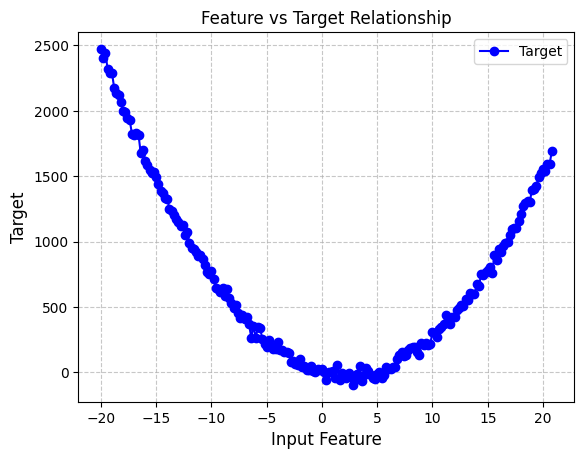

In [ ]:
plt.plot(df.x, df.y, label='Target', color='blue', linestyle='-', marker='o')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Input Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.legend(loc='best')
plt.title('Feature vs Target Relationship')
plt.show()

In [11]:
# Save all data
df.to_csv('./data/quadratic_all.csv', index=False, columns=['x','y'])

<h2>SageMaker Convention for Training and Validation files</h2>

CSV File Column order: y_noisy, x

Training, Validation files do not have a column header

In [12]:
# Define data split: 
# Training = 70% of the data
# Validation = 30% of the data

# Set random seed to ensure same shuffle pattern each time
np.random.seed(5)

# Convert dataframe index to list for shuffling
l = list(df.index)

# Randomly reorder the index list
np.random.shuffle(l)

# Reindex dataframe using shuffled indices
# iloc: integer-location based indexing
df = df.iloc[l]

In [13]:
# Get total number of rows using df.shape[0]
# shape[0] returns number of rows, shape[1] would return columns
rows = df.shape[0]

# Calculate size of training set
# Multiply total rows by 0.7 (70%) and convert to integer
train = int(.7 * rows)

# Calculate size of test set
# Subtract training size from total to get remaining 30%
test = rows-train

In [14]:
rows, train, test

(205, 143, 62)

In [15]:
# Write Training Set
df[:train].to_csv('./data/quadratic_train.csv',index=False,header=False,columns=['y','x'])

In [16]:
# Write Validation Set
df[train:].to_csv('./data/quadratic_validation.csv',index=False,header=False,columns=['y','x'])